
# SAR Application: Landslide
### I. How to create SAR quicklook images of landslides? 

* Useful Products: Coherence
* Useful Wavelengths: L
* Instructions to View: InSAR decorrelation
* Qualitative Browse Products: How does the user know there is something in the image related to flooding before they develop/implement any algorithms? 

### II. How to interpret SAR images of landslides?
The radar's signal has an amplitude and phase. Amplitude is the strength of the reflected signal, determined by interactions with the ground surface, and *phase* is the specific point on the wavelength cycle, determined by the distance from the sensor to the ground. 

In InSAR, differences radar phase are measured between data collections. Radar phase is measurement of distance between radar antenna and the ground. Radar coherence or decorrelation measures how well the phase signal is preserved between data  acquisitions. Disturbed areas become decorrelated and have lower coherence values.

Decorrelation can be caused by a number of factors, including volumetric, geometric, temporal (gradual) and sudden changes. For example, if there is a sudden change with a landslide that disrups the surface, which would cause low correlation and random phase. 

L-Band provides a more stable wavelength measurement for landslides in vegetated areas, since it penetrates past smaller leaves and vegetation and will have less decorrelation than smaller wavelengths. 

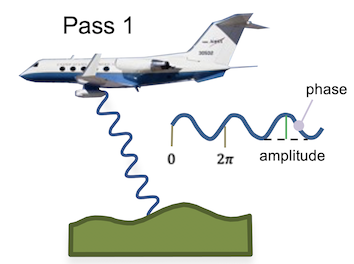

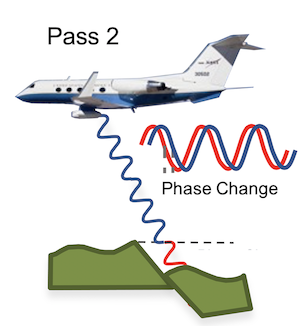

## Thomas Fire Montecito Debris Flows
SanAnd_26530 (2 November 2017 and 5 February 2018). "We use the 2017 Thomas fire and ensuing Montecito debris flow as a case study to demonstrate how application of various interferometric synthetic aperture radar postprocessing techniques can be used to highlight the fire scar and major damage areas from the debris flows" (Donnellan et. al, 2018).

The content of this notebook is as follows:

1. [Running the Notebook](#s1)
2. [UAVSAR PolSAR, Coherence, and Interferogram Images](#s2)
3. [Plotting Coherence](#s3)

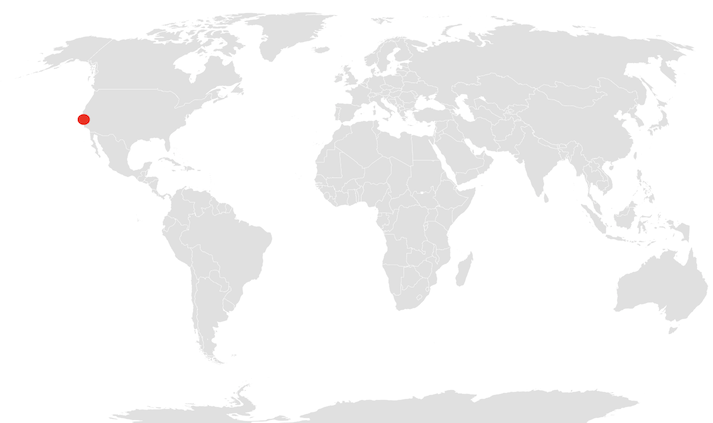

<a name="s1"></a>
## 1. Running the Notebook
- To run the content, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 
- To access the data for this notebook, download the data at this link. Click this link to a shared Google Drive data folder and "Download All." (This link is currently in my @jpl.caltech.edu Google Account and has sharing limitations. Moving forward, this would be a publically accessible folder/data download link).
  - Link to data folder: https://drive.google.com/drive/folders/19fzQ6I1-2SUX5O0fsx4bk4Fk576UA3qT?usp=sharing
  - Upload these downloaded files to Google Colab by running the cell below. A "Choose Files" button should appear. Select all the files in the downloaded folder. (Note: these will upload to a temporary "content" folder).
  - As a note, uploading larger files will take longer. If an upload error is encountered, try using Chrome instead of Safari. 

In [ ]:
from google.colab import files
uploaded = files.upload()

### Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are installed in the cell below before imported.

In [ ]:
!pip install rasterio --quiet

import numpy as np
import rasterio as rio
import pandas as pd
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
from rasterio.plot import show
from pathlib import Path

<a name="s2"></a>
## 2. UAVSAR PolSAR, Coherence, and Interferogram Images

#### UAVSAR PolSAR Image

#### UAVSAR Coherence Image


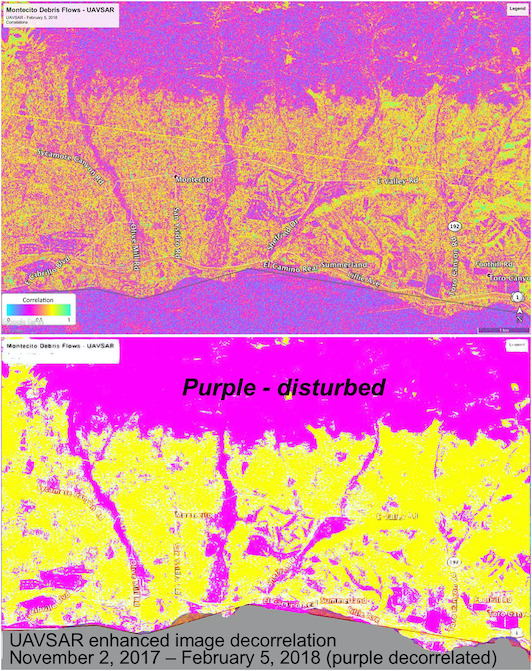

#### UAVSAR Interferogram



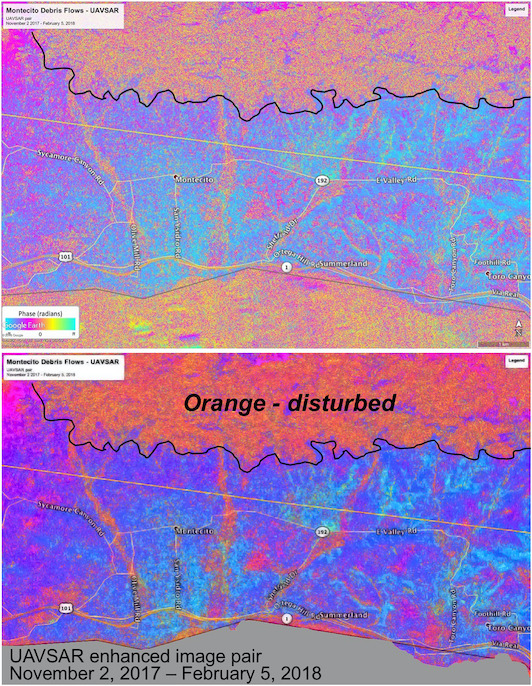

<a name="s3"></a>
## 3. Plotting Coherence

This map compares UAVSAR images from before and after the Thomas Fire in Santa Barbara County. Darker areas have low coherence, meaning the surface changed significantly from November to February. This shows the fire’s burn perimeter and resulting debris flows following heavy rain in January. A coherence map can be used for immediate response after a fire to highlight areas of most severe damage.

Read in Coherence image

Speckle filter Coherence Image

Speckle filter with pyradar? https://pyradar-tools.readthedocs.io/en/latest/examples.html#example-of-filtros

Despeckle Lee Filter 
StackOverflow: https://stackoverflow.com/questions/39785970/speckle-lee-filter-in-python

In [ ]:
with rio.open("SanAnd_26530_17122-002_18001-007_0095d_s01_L090HH_02_cropped.cor.grd.tif") as ds:
  coherence = ds.read(1)

#Set no data
coherence[coherence== 0] = np.nan

Plot Coherence image with either fire perimeter or other landslide risk data

Histogram of Coherence Image

Assign different colors above/below threshold

Text(0.5, 1.0, 'Coherence 2 November 2017 and 5 February 2018')

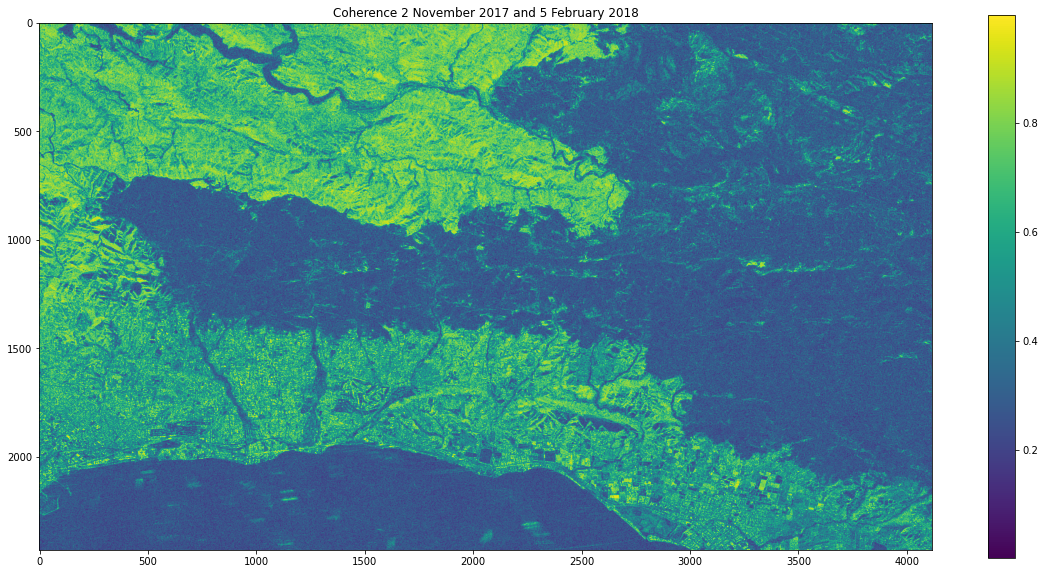

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(coherence)
plt.colorbar()
plt.title('Coherence 2 November 2017 and 5 February 2018')


### Coherence Histogram

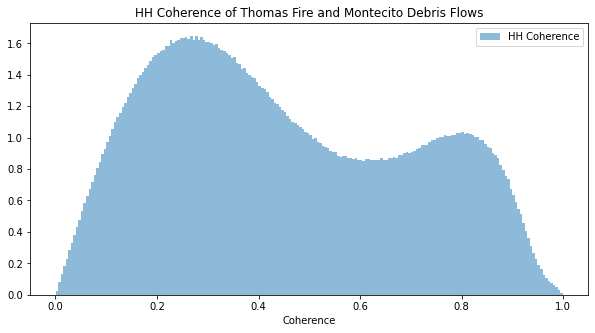

In [ ]:
## Histogram
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(coherence.ravel(), density=True, bins=200, alpha=0.5, label='HH Coherence')
ax.set_title('HH Coherence of Thomas Fire and Montecito Debris Flows')
ax.legend(prop={'size': 10})
ax.set_xlabel('Coherence')

plt.show()

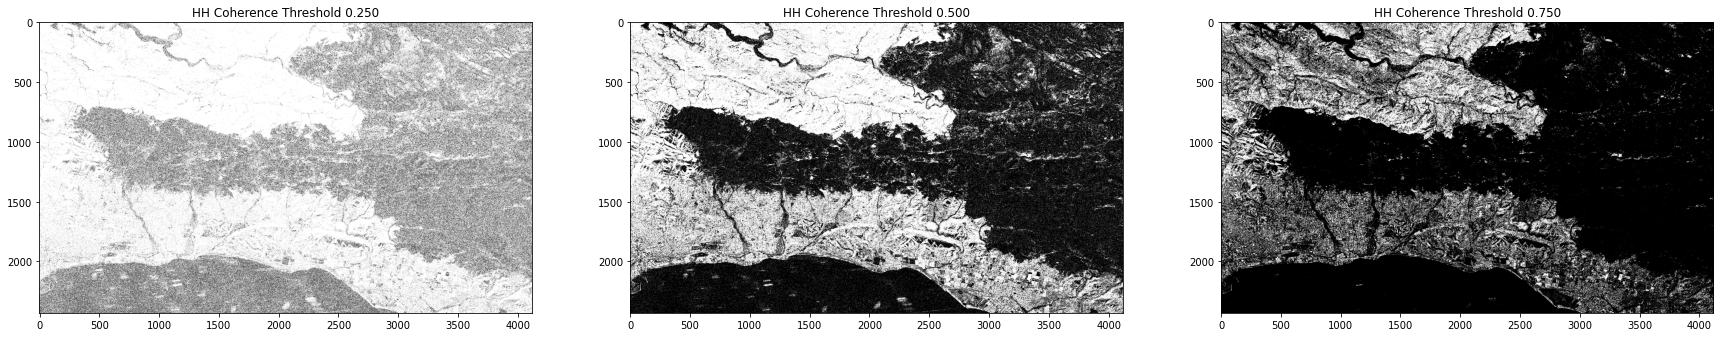

In [ ]:
## Thresholding
N=3
thresh_arr = np.linspace(0.25, 0.75, N)
fig, ax = plt.subplots(1, N, figsize=(30, 15))
for ax, thresh in zip(ax.ravel(), thresh_arr):
    ax.imshow(coherence < thresh, cmap="Greys")
    ax.set_title(f'HH Coherence Threshold {thresh:0.3f}')

## Other Resources



## References

Donnellan, A., Parker, J., Milliner, C., Farr, T.G., Glasscoe, M., Lou, Y., Zheng, Y. Hawkins, B. (2018). UAVSAR and Optical Analysis of the Thomas Fire Scar and Montecito Debris Flows: Case Study of Methods for Disaster Response Using Remote Sensing Products. Earth and Space Science 5, 339-347. DOI: 10.1029/2018EA000398. Link:https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018EA000398.

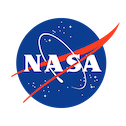

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2020. California Institute of Technology. Government sponsorship acknowledged. 